## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')

## Read Stock Price Data

In [2]:
# read prices from csv file
# Note this is not the data used in the report
prices = pd.read_csv('vbr19_21.csv', index_col='Date')
prices

,COMM,APLE,MUR,BOH,BRKL,ROIC,GPMT,ETRN,EQC,PK,...,ITGR,HTLF,KEX,TGTX,WWW,MAC,CBT,FHI,CENTA,SFNC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,17.070000,12.313745,21.013939,59.681000,12.236936,13.722713,12.616605,13.869140,22.345003,22.061646,...,74.290001,40.979637,67.959999,4.310000,30.174379,32.908199,38.830513,21.820715,31.700001,21.641390
2019-01-03,16.799999,12.365776,21.485378,60.195713,12.263047,13.855087,12.581751,13.869140,22.421110,22.078909,...,73.400002,40.444439,66.599998,4.210000,29.557806,33.491997,37.785152,21.421408,32.380001,21.791803
2019-01-04,17.440001,12.669283,22.358412,61.286224,12.524149,14.022759,12.874514,14.375110,22.398277,22.674467,...,77.260002,41.653248,67.279999,4.610000,30.193058,33.975948,39.500626,21.579462,33.049999,22.349203
2019-01-07,17.870001,12.834044,22.742552,61.766033,12.628587,14.349281,13.069688,14.278070,22.398277,23.062878,...,76.019997,41.819340,68.150002,4.840000,30.351873,34.874699,39.813354,21.654337,34.419998,22.437681
2019-01-08,18.049999,13.163568,23.196524,62.167366,12.759140,14.808174,13.195156,14.368174,22.687485,24.124529,...,77.860001,42.160755,68.169998,4.810000,30.800289,35.727356,39.992043,21.579462,34.160000,22.561544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,10.830000,15.386879,25.182875,80.484322,15.329553,18.235245,10.491848,9.430489,24.970016,18.831568,...,85.790001,49.264679,59.700001,19.389999,27.995754,16.216167,53.478573,36.163910,46.830002,28.309172
2021-12-27,11.090000,15.500785,26.346216,81.218201,15.561087,18.486496,10.474506,9.625219,25.056417,18.909666,...,86.589996,49.635971,59.750000,18.650000,28.248405,16.397087,54.438789,36.647766,47.580002,28.735022
2021-12-28,11.070000,15.320434,25.945398,81.285782,15.657560,18.525154,10.448495,9.449034,24.960417,18.694895,...,86.110001,49.821621,59.639999,19.030001,28.005470,16.406609,54.458393,36.550999,47.610001,28.831804


In [3]:
log_prices = np.log(prices) 
log_cumret = np.log(prices).diff().cumsum() + 1  # calculate cumulative returns
log_prices.dropna(inplace=True)
log_cumret.dropna(inplace=True) # remove missing values

In [4]:
log_prices

,COMM,APLE,MUR,BOH,BRKL,ROIC,GPMT,ETRN,EQC,PK,...,ITGR,HTLF,KEX,TGTX,WWW,MAC,CBT,FHI,CENTA,SFNC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2.837323,2.510716,3.045186,4.089014,2.504459,2.619052,2.535014,2.629666,3.106603,3.093841,...,4.307976,3.713075,4.218919,1.460938,3.406993,3.493722,3.659206,3.082860,3.456317,3.074608
2019-01-03,2.821379,2.514933,3.067373,4.097601,2.506590,2.628652,2.532247,2.629666,3.110003,3.094623,...,4.295924,3.699929,4.198705,1.437463,3.386348,3.511307,3.631916,3.064391,3.477541,3.081534
2019-01-04,2.858766,2.539180,3.107203,4.115555,2.527659,2.640682,2.555250,2.665498,3.108984,3.121239,...,4.347176,3.729379,4.208863,1.528228,3.407612,3.525653,3.676317,3.071742,3.498022,3.106791
2019-01-07,2.883123,2.552101,3.124238,4.123354,2.535963,2.663700,2.570296,2.658725,3.108984,3.138224,...,4.330996,3.733359,4.221711,1.576915,3.412858,3.551762,3.684202,3.075206,3.538638,3.110742
2019-01-08,2.893146,2.577453,3.144002,4.129830,2.546248,2.695179,2.579850,2.665016,3.121813,3.183229,...,4.354912,3.741490,4.222005,1.570697,3.427524,3.575917,3.688680,3.071742,3.531055,3.116247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2.382320,2.733515,3.226164,4.388062,2.729783,2.903356,2.350599,2.243948,3.217676,2.935535,...,4.451902,3.897207,4.089332,2.964757,3.332053,2.786009,3.979281,3.588062,3.846524,3.343186
2021-12-27,2.406044,2.740891,3.271325,4.397139,2.744773,2.917041,2.348944,2.264387,3.221130,2.939673,...,4.461184,3.904716,4.090169,2.925846,3.341037,2.797104,3.997077,3.601352,3.862413,3.358117
2021-12-28,2.404239,2.729187,3.255994,4.397971,2.750954,2.919129,2.346458,2.245912,3.217291,2.928250,...,4.455626,3.908449,4.088326,2.946017,3.332400,2.797684,3.997437,3.598709,3.863043,3.361479


In [5]:
log_cumret

,COMM,APLE,MUR,BOH,BRKL,ROIC,GPMT,ETRN,EQC,PK,...,ITGR,HTLF,KEX,TGTX,WWW,MAC,CBT,FHI,CENTA,SFNC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,0.984056,1.004217,1.022187,1.008587,1.002132,1.009600,0.997234,1.000000,1.003400,1.000782,...,0.987948,0.986854,0.979785,0.976525,0.979355,1.017585,0.972710,0.981531,1.021224,1.006926
2019-01-04,1.021444,1.028464,1.062017,1.026541,1.023200,1.021629,1.020236,1.035832,1.002381,1.027399,...,1.039200,1.016304,0.989944,1.067290,1.000619,1.031931,1.017110,0.988882,1.041705,1.032183
2019-01-07,1.045801,1.041385,1.079052,1.034340,1.031504,1.044647,1.035282,1.029059,1.002381,1.044384,...,1.023020,1.020284,1.002792,1.115977,1.005865,1.058040,1.024996,0.992346,1.082321,1.036134
2019-01-08,1.055823,1.066737,1.098816,1.040816,1.041789,1.076127,1.044836,1.035349,1.015211,1.089389,...,1.046936,1.028415,1.003085,1.109759,1.020531,1.082195,1.029474,0.988882,1.074739,1.041639
2019-01-09,1.073396,1.077222,1.136125,1.054752,1.002841,1.071947,1.051155,1.062475,1.023229,1.097229,...,1.053720,1.026443,1.031146,1.132371,1.027482,1.081119,1.045432,0.992346,1.072394,1.047504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.544998,1.222799,1.180978,1.299049,1.225324,1.284304,0.815585,0.614282,1.111073,0.841694,...,1.143926,1.184132,0.870413,2.503820,0.925060,0.292287,1.320075,1.505202,1.390207,1.268578
2021-12-27,0.568721,1.230175,1.226139,1.308126,1.240314,1.297988,0.813931,0.634720,1.114527,0.845833,...,1.153208,1.191641,0.871250,2.464908,0.934044,0.303382,1.337871,1.518493,1.406096,1.283509
2021-12-28,0.566916,1.218471,1.210808,1.308957,1.246495,1.300077,0.811444,0.616246,1.110689,0.834410,...,1.147649,1.195374,0.869407,2.485079,0.925407,0.303962,1.338231,1.515849,1.406726,1.286871


In [6]:
def parse_pair(pair):

    dp = pair.find('-')
    s1 = pair[:dp]
    s2 = pair[dp+1:]
    
    return s1,s2

def cadf_pvalue(s1, s2, log_price):
    
    p1 = coint(log_price[s1], log_price[s2])[1]
    p2 = coint(log_price[s2], log_price[s1])[1]
    return min(p1,p2)


def pairs(train_cum, train_price):
    '''
        Construct information for pairs: distance, correlation, cointegration, AR half life
    '''
 
    tested = []
    pairs = pd.DataFrame()
    pairs.index = pd.DatetimeIndex(pairs.index).to_period('M')

    for s1 in train_cum.columns:
        for s2 in train_cum.columns:
            if s1!=s2 and (f'{s1}-{s2}' not in tested) and (f'{s2}-{s1}' not in tested) :
                tested.append(f'{s1}-{s2}')
                correlation = np.corrcoef(train_cum[s1], train_cum[s2])[0][1]
                pairs.loc[f'{s1}-{s2}',"Correlation"] = correlation
                distance  = np.sqrt(np.sum((train_cum[s1] - train_cum[s2])**2))
                pairs.loc[f'{s1}-{s2}',"Distance"] = distance                             
                cadf_p = coint(train_price[s1], train_price[s2])[1]
                pairs.loc[f'{s1}-{s2}',"Cointegration"] = True if cadf_p < 0.01 else False
                df_stationarityTest = adfuller(train_cum[s1]-train_cum[s2], autolag='AIC')
                if df_stationarityTest[1]<= 0.05:
                    ar_model = AutoReg(train_cum[s1]-train_cum[s2], lags=4).fit()
                    param_sum = 0
                    for i in range(len(ar_model.params)):
                        if i != 0:
                            param_sum += ar_model.params[i]    
                            half_life = -math.log(2)/math.log(param_sum)
                    pairs.loc[f'{s1}-{s2}',"AR Half-life"] = half_life
                else:
                    pairs.loc[f'{s1}-{s2}',"AR Half-life"] = "Not Stationary"
                
    return pairs

def plot_pairs(pairs, pairs_info, train_cum, train_price, test_cum, test_price, method):
    '''
        Test Criteria on Selected Pairs
    '''
    cols = [method, 'Criteria 1' ,'Criteria 2']
    criteria= pd.DataFrame(columns=cols)
    for pair in pairs:
        print(pair)
        s1,s2 = parse_pair(pair)
        res = OLS(train_price[s1], add_constant(train_price[s2])).fit()
        train_spread = train_price[s1] - res.params[s2]*train_price[s2]
        test_spread = test_price[s1] - res.params[s2]*test_price[s2]
        if method != "Cointegration":
            train_spread = train_cum[s1] - train_cum[s2]
            test_spread = test_cum[s1] - test_cum[s2]
        test_mean = test_spread.mean()
        spread_mean = train_spread.mean() # historical mean
        spread_std = train_spread.std() # historical standard deviation
        in_interval = 0
        total_day = 0
        for i in test_spread:
            total_day += 1
            if i <= spread_mean + 2*spread_std and i >= spread_mean - 2*spread_std:
                in_interval += 1
        fig, (ax2) = plt.subplots(1, 1, figsize=(9,4))
        ax2.plot(test_spread, label='Spread',color='steelblue')
        ax2.set_title(f'Trading Period({s1}-{s2})')
        ax2.axhline(y=spread_mean, color='g', linestyle='dotted', label='Mean(Formation)')
        ax2.axhline(y=test_mean, color='palevioletred', linestyle='dotted', label='Mean(Trading)')
        ax2.axhline(y=spread_mean+2*spread_std, color='orange', linestyle='dotted', label='2-SD Boundary')
        ax2.axhline(y=spread_mean-2*spread_std, color='orange', linestyle='dotted')
        ax2.legend()
        plt.savefig(f'{method}-{pair}')
        target = abs((spread_mean - test_mean)/test_spread.std())
        criteria.loc[f'{s1}-{s2}',method] = pairs_info.loc[f'{s1}-{s2}',method]
        criteria.loc[f'{s1}-{s2}',"Criteria 1"] = (in_interval/total_day) * 100
        criteria.loc[f'{s1}-{s2}', "Criteria 2"] = target
        
    return criteria

In [7]:
cumret = log_cumret.loc['2019-01-02':]
price = log_prices.loc['2019-01-02':]
cumret = cumret / cumret.iloc[0] 
price = price/price.iloc[0]
train_cum = cumret.loc['2019-01-02':'2020-12-31'] # formation period
train_price = price.loc['2019-01-02':'2020-12-31']
test_cum = cumret.loc['2021-01-04':'2021-12-30'] # trading period
test_price = price.loc['2021-01-04':'2021-12-30']
pairs_info = pairs(train_cum,train_price)

In [8]:
pairs_info

,Correlation,Distance,Cointegration,AR Half-life
COMM-APLE,0.714405,7.573155,False,Not Stationary
COMM-MUR,0.795653,5.922360,False,Not Stationary
COMM-BOH,0.573230,10.152966,False,Not Stationary
COMM-BRKL,0.697276,7.055223,False,Not Stationary
COMM-ROIC,0.658445,7.373396,False,Not Stationary
...,...,...,...,...
CBT-CENTA,0.006377,5.135704,False,Not Stationary
CBT-SFNC,0.678191,3.700472,False,Not Stationary
FHI-CENTA,-0.330529,7.741496,False,Not Stationary
FHI-SFNC,0.788624,5.754208,False,22.397841


## Selected by Distance

EGP-FR
NWE-BKH
CENT-CENTA
UA-UAA
IDA-OGS


,Distance,Criteria 1,Criteria 2
EGP-FR,0.66861,87.250996,0.586887
NWE-BKH,0.67094,80.079681,0.268183
CENT-CENTA,0.681796,99.601594,1.109861
UA-UAA,0.730199,24.701195,2.170003
IDA-OGS,0.748798,10.358566,1.915621


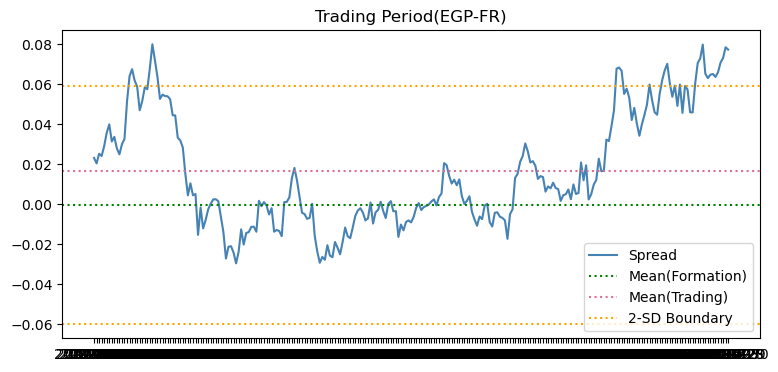

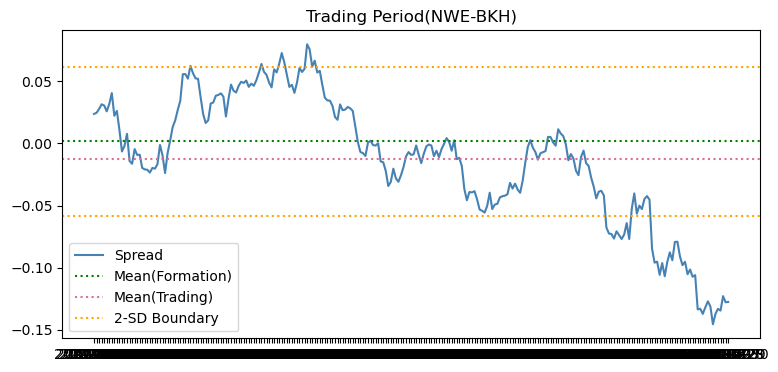

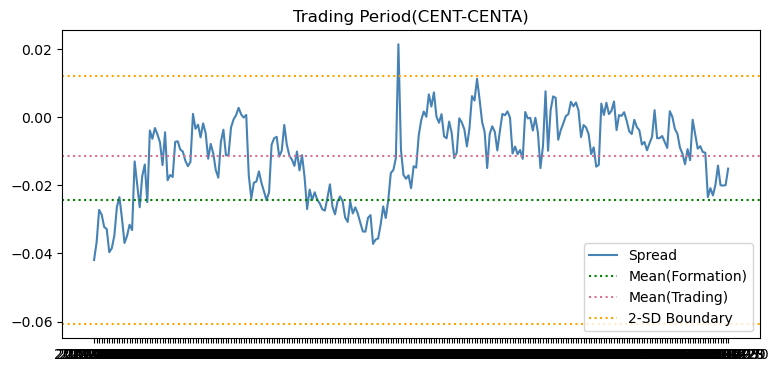

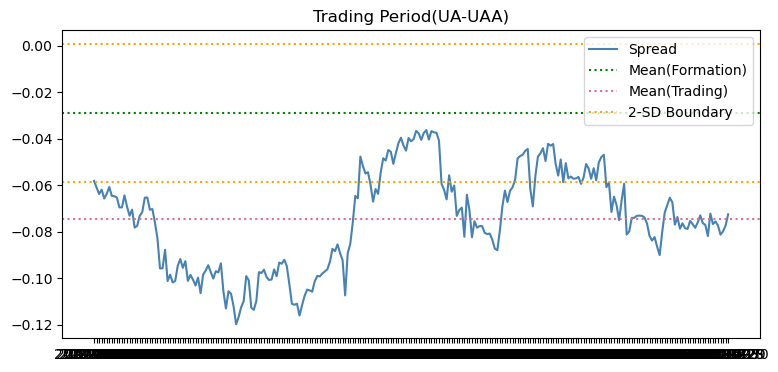

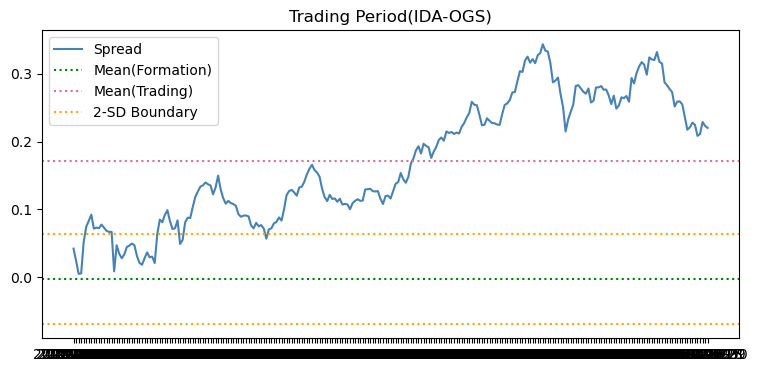

In [9]:
top5_dist = pairs_info.sort_values(by=['Distance']).index[:5]
plot_pairs(top5_dist, pairs_info, train_cum, train_price, test_cum, test_price, "Distance")

## Selected by Correlation

UA-UAA
PK-PEB
CENT-CENTA
ROIC-SITC
GPMT-ARI


,Correlation,Criteria 1,Criteria 2
UA-UAA,0.999191,24.701195,2.170003
PK-PEB,0.994434,100.0,0.670625
CENT-CENTA,0.993122,99.601594,1.109861
ROIC-SITC,0.990498,58.964143,2.841026
GPMT-ARI,0.989352,100.0,1.788243


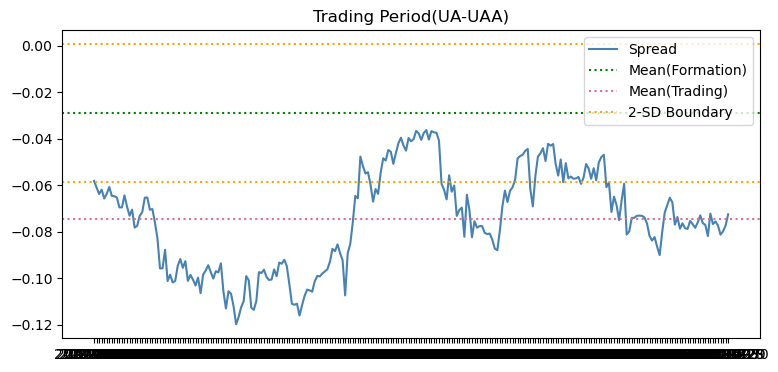

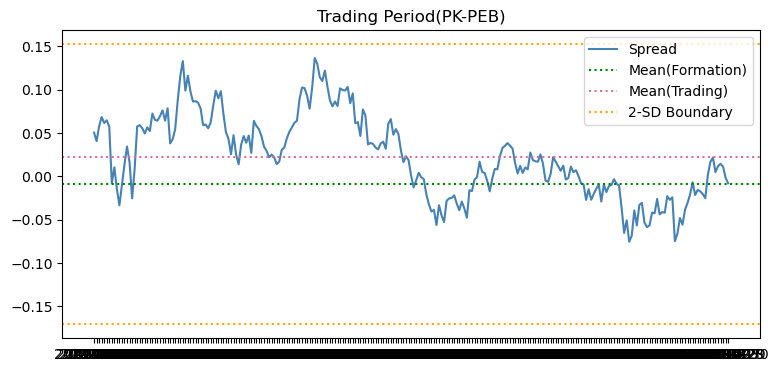

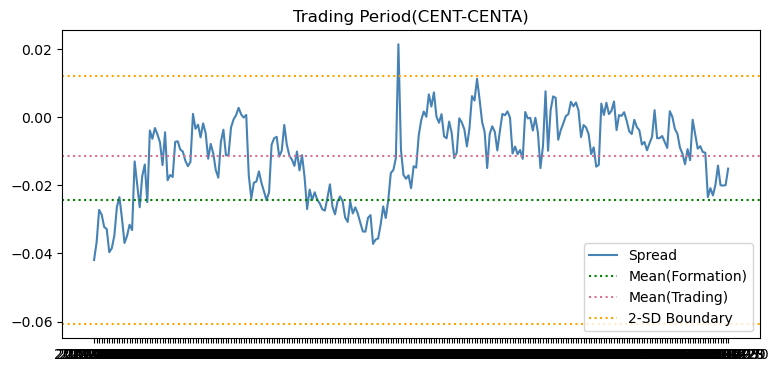

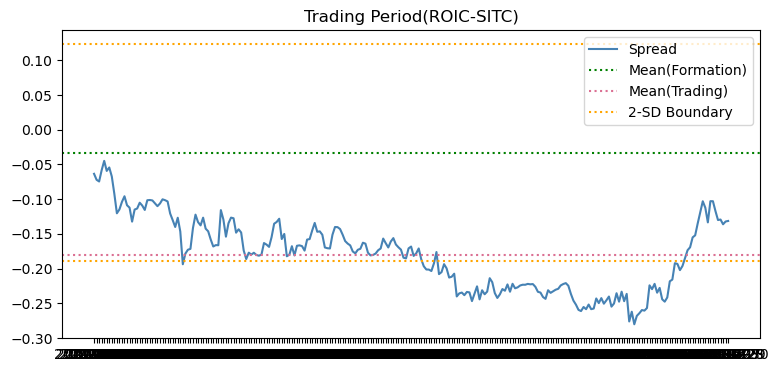

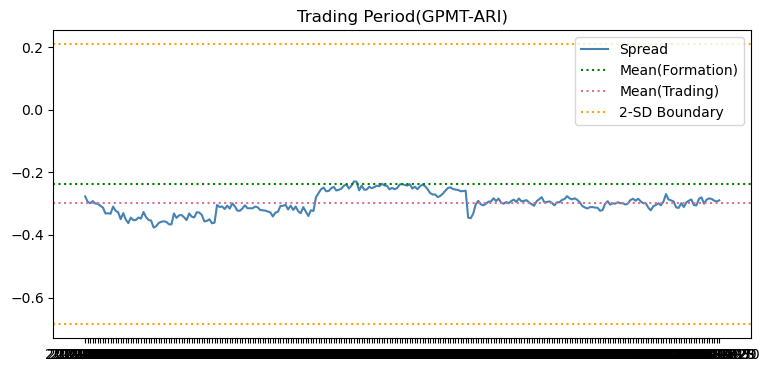

In [10]:
top5_corr = list(pairs_info.sort_values(by='Correlation',ascending = False).index[:5])
plot_pairs(top5_corr, pairs_info, train_cum, train_price, test_cum, test_price, "Correlation")

## Selected by AR Half-life

ARI-SITC
APLE-ASB
WTM-IDA
WH-HOMB
SBRA-FHI


,AR Half-life,Criteria 1,Criteria 2
ARI-SITC,4.585685,50.59761,2.359221
APLE-ASB,5.816936,93.625498,1.916989
WTM-IDA,5.928329,39.840637,0.699601
WH-HOMB,6.31453,87.250996,0.12854
SBRA-FHI,6.452195,58.565737,1.254229


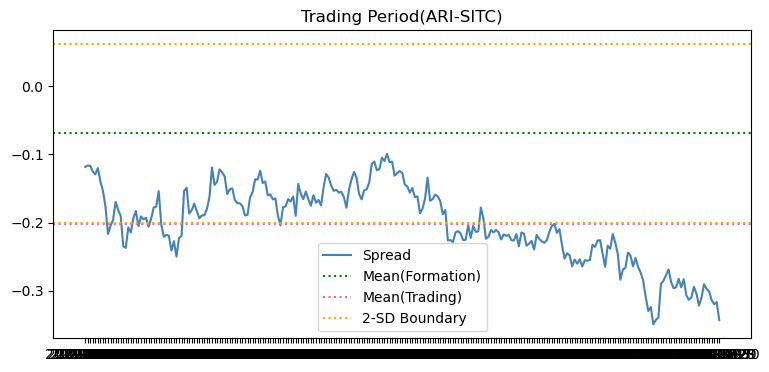

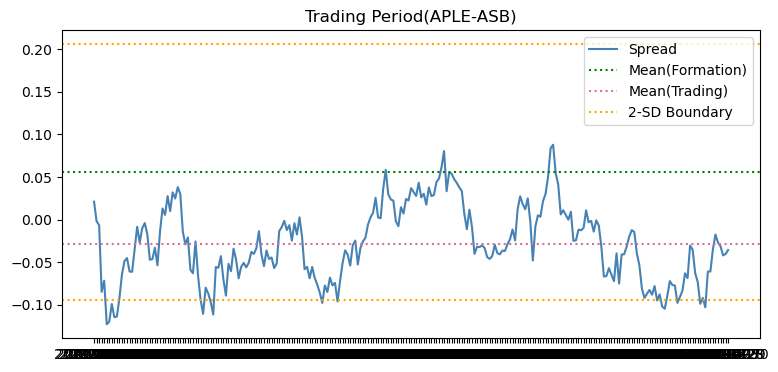

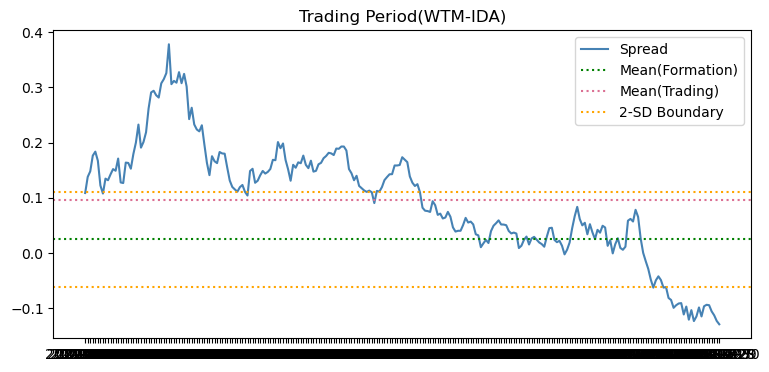

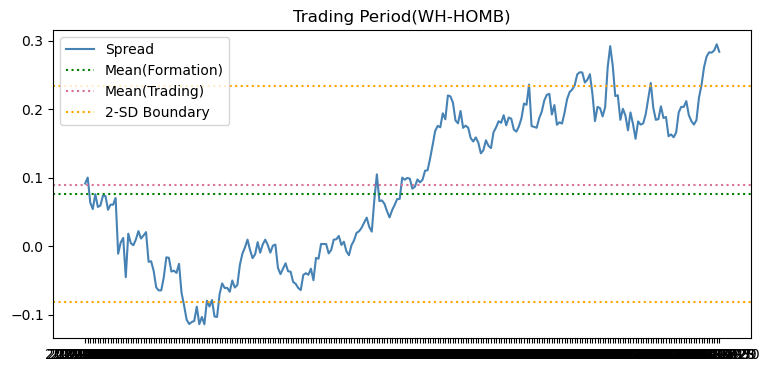

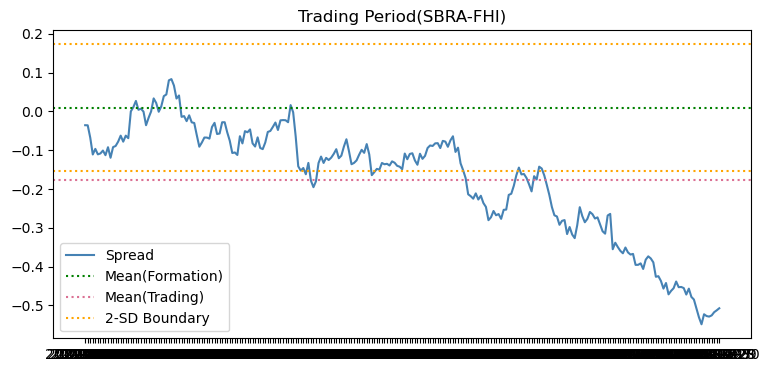

In [11]:
top5_ar = list(pairs_info[pairs_info['AR Half-life'] != "Not Stationary"].sort_values(by=['AR Half-life']).index[:5])
plot_pairs(top5_ar,pairs_info, train_cum, train_price, test_cum, test_price, "AR Half-life")

## Selected by Cointegration and Sorted by Correlation

ROIC-ARI
BRKL-FULT
ASB-PEB
PK-ASB
NWE-BKH


,Cointegration,Criteria 1,Criteria 2
ROIC-ARI,True,90.039841,0.709151
BRKL-FULT,True,97.609562,0.517016
ASB-PEB,True,5.577689,2.983999
PK-ASB,True,7.968127,2.590749
NWE-BKH,True,78.087649,0.254478


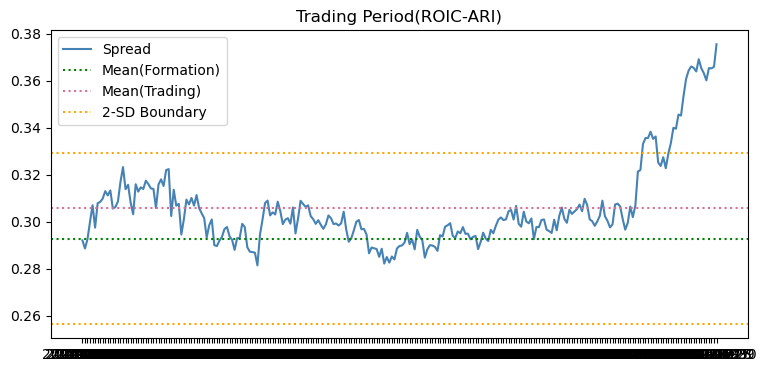

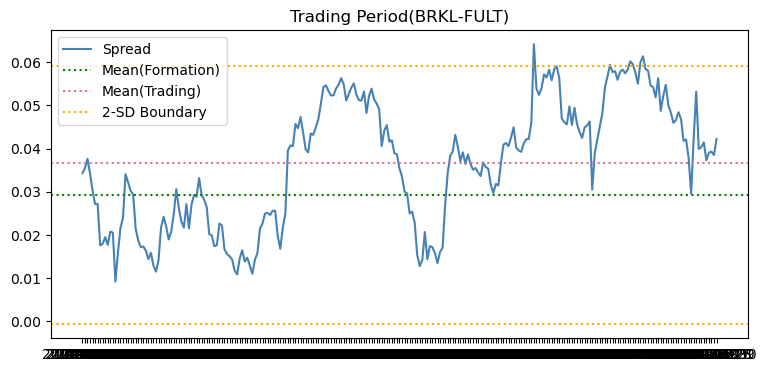

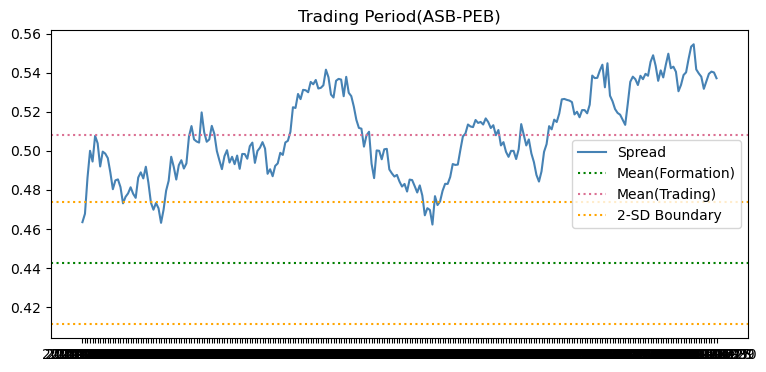

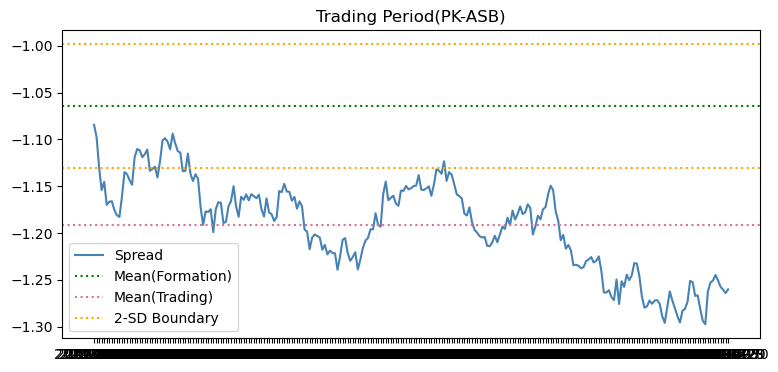

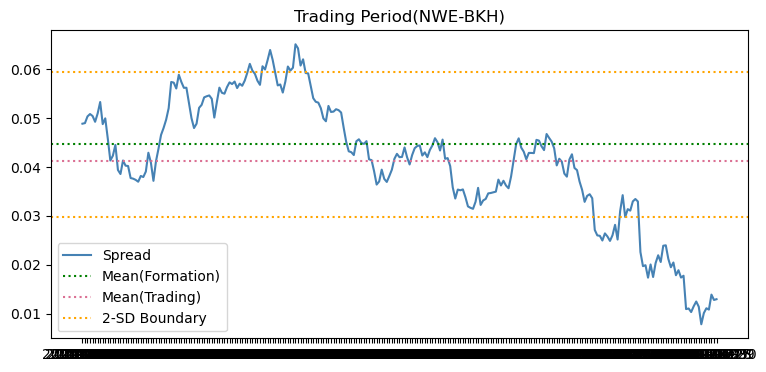

In [12]:
top5_coint_corr = list(pairs_info[pairs_info['Cointegration'] != False].sort_values(by=['Correlation'], ascending = False).index[:5])
plot_pairs(top5_coint_corr,pairs_info, train_cum, train_price, test_cum, test_price, "Cointegration")

## Selected by Cointegration and Sorted by Distance

NWE-BKH
BRKL-FULT
OGS-NWE
POR-OGS
BOH-AIV


,Cointegration,Criteria 1,Criteria 2
NWE-BKH,True,78.087649,0.254478
BRKL-FULT,True,97.609562,0.517016
OGS-NWE,True,11.155378,2.384153
POR-OGS,True,12.749004,1.908143
BOH-AIV,True,23.904382,1.22489


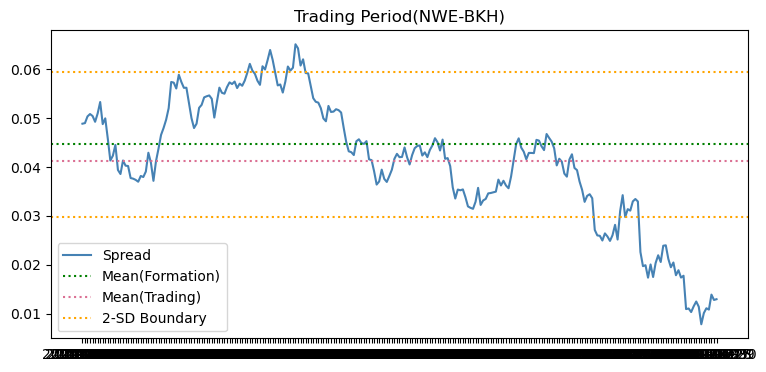

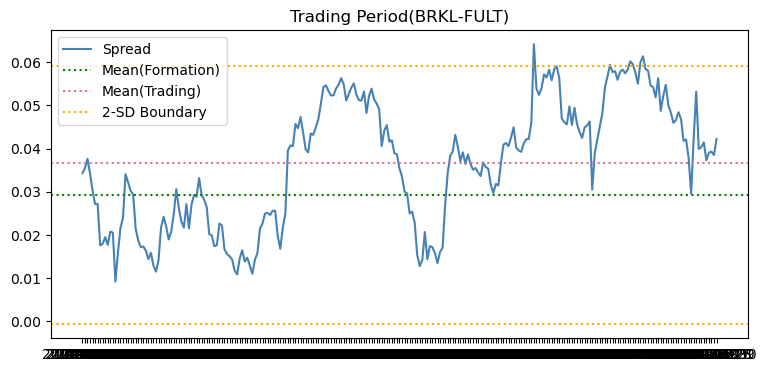

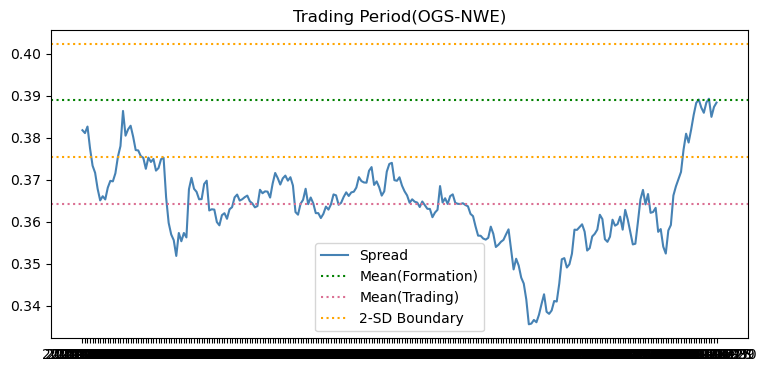

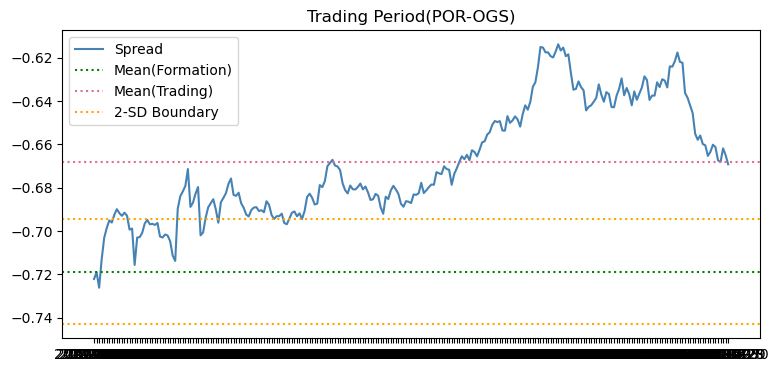

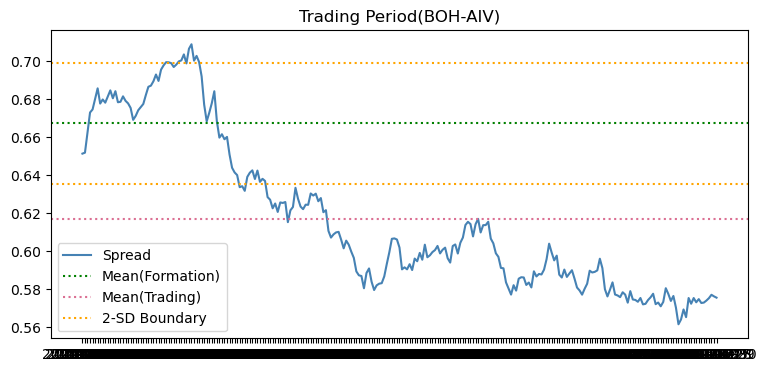

In [13]:
top5_coint_dist = list(pairs_info[pairs_info['Cointegration'] != False].sort_values(by=['Distance']).index[:5])
plot_pairs(top5_coint_dist,pairs_info, train_cum, train_price, test_cum, test_price, "Cointegration")